In [2]:
import seaborn as sns
sns.set(style="ticks")

(160, 160)


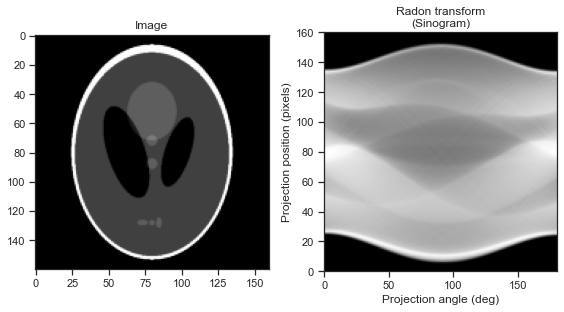

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')
print(image.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Image")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

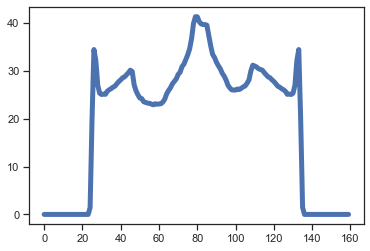

In [ ]:
proj = np.sum(image,axis=0)   # projection on the x axis (along the y axis)
plt.plot(proj,linewidth=5.0)

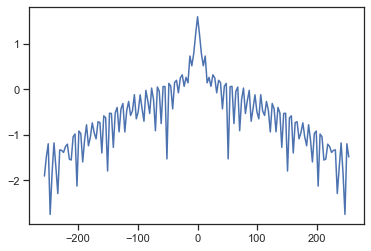

In [67]:
f1d  = np.fft.fft(proj)    # 1D Fourier
N = len(f1d)
normalize = N/2
#plt.plot(np.abs(f1d)/normalize)

sampling_rate = 512.0 # It's used as a sample spacing
frequency_axis = np.fft.fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(f1d)/normalize
# Plot the results
FSort = np.argsort(frequency_axis)

plt.plot(frequency_axis[FSort], np.log10(norm_amplitude[FSort]))


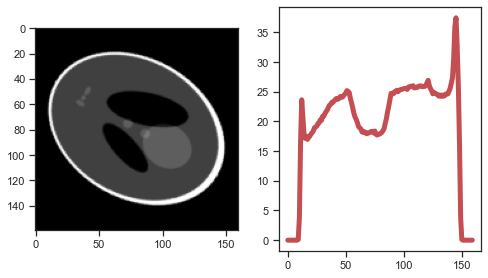

In [ ]:
imageR = skimage.transform.rotate(image, -120)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
ax1.imshow(imageR, cmap=plt.cm.Greys_r)
projR = np.sum(imageR,axis=0)   # projection on the x axis (along the y axis)
ax2.plot(projR,linewidth=5.0,color='r')

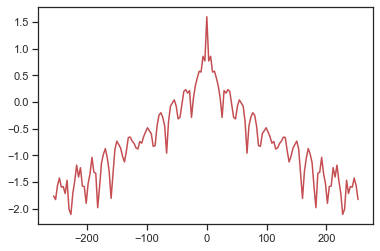

In [69]:
f1d  = np.fft.fft(projR)    # 1D Fourier
N = len(f1d)
normalize = N/2
#plt.plot(np.abs(f1d)/normalize)

sampling_rate = 512.0 # It's used as a sample spacing
frequency_axis = np.fft.fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(f1d)/normalize
# Plot the results
FSort = np.argsort(frequency_axis)

plt.plot(frequency_axis[FSort], np.log10(norm_amplitude[FSort]),color='r')



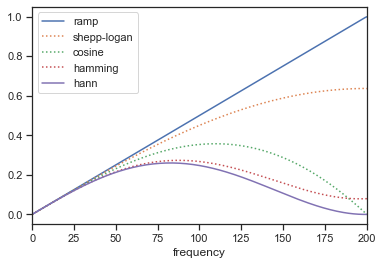

In [79]:
import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(400, f)
    if (f == 'shepp-logan' or f =='cosine' or f =='hamming'):
        plt.plot(response,':',label=f)
    else:
        plt.plot(response, label=f)
   
plt.xlim([0, 200])
plt.xlabel('frequency')
plt.legend()
plt.show()

FBP rms reconstruction error: 0.042


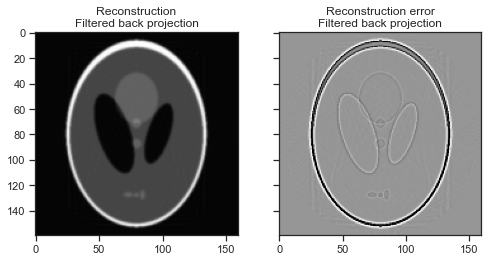

In [72]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='cosine')
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

In [13]:
# import skimage
# R = skimage.transform.radon(im, np.linspace(0,180,100))
# x = skimage.transform.iradon(R, np.linspace(0,180,100))
# plt.imshow(x, vmin=0, vmax=1)
# plt.show()


In [14]:

# import skimage.data
# im = skimage.data.shepp_logan_phantom()
# im = skimage.transform.rotate(im, 15)
# plt.imshow(im)
# plt.gray()
# plt.show()


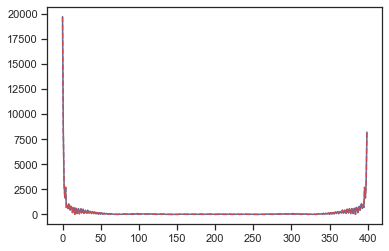

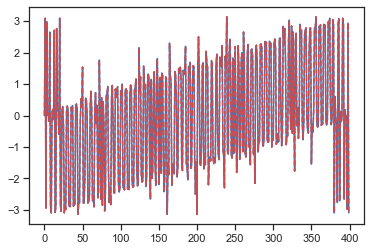

In [15]:
im = skimage.data.shepp_logan_phantom()
proj = np.sum(im,axis=0)   # projection on the x axis (along the y axis)
f1d  = np.fft.fft(proj)    # 1D Fourier
f2d  = np.fft.fft2(im)     # 2D Fourier
xslice = f2d[0,:]          # slice along x (through zero frequency)

plt.plot(np.abs(f1d),'b')
plt.plot(np.abs(xslice),'r--')
plt.show()
plt.plot(np.angle(f1d),'b')
plt.plot(np.angle(xslice),'r--')
plt.show()

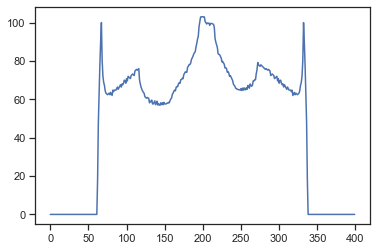

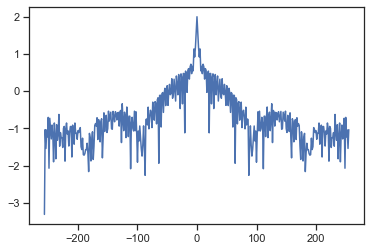

In [85]:
f1d  = np.fft.fft(proj)    # 1D Fourier
N = len(f1d)
normalize = N/2
#plt.plot(np.abs(f1d)/normalize)

sampling_rate = 512.0 # It's used as a sample spacing
frequency_axis = np.fft.fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(f1d)/normalize
# Plot the results
FSort = np.argsort(frequency_axis)

plt.plot(frequency_axis[FSort], np.log10(norm_amplitude[FSort]))


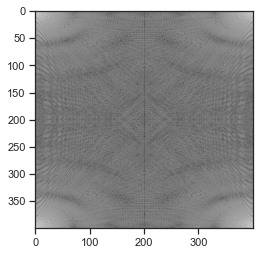

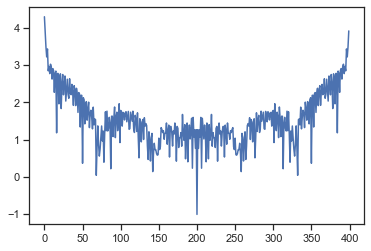

In [86]:
plt.imshow(np.log10(np.abs(f2d)))
plt.show()
plt.plot(np.log10(np.abs(f2d[0,:])))